In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from scipy import stats

In [3]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

In [4]:
import pandas_datareader as web

In [ ]:
start = pd.to_datetime("2013-12-01")
end = pd.to_datetime("2018-12-01")

In [23]:
spy_etf = web.DataReader("SPY","iex",start=start,end=end)

In [24]:
spy_etf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open,1249.0,2.153428e+02,3.598243e+01,1.592298e+02,1.879886e+02,1.995649e+02,2.421199e+02,2.930900e+02
high,1249.0,2.162536e+02,3.607870e+01,1.599313e+02,1.889704e+02,2.004511e+02,2.423642e+02,2.932200e+02
low,1249.0,2.143384e+02,3.584856e+01,1.582460e+02,1.870134e+02,1.989846e+02,2.415433e+02,2.918100e+02
close,1249.0,2.153661e+02,3.594738e+01,1.586650e+02,1.879050e+02,1.996167e+02,2.418658e+02,2.922574e+02
volume,1249.0,1.003293e+08,4.911150e+07,2.785651e+07,6.690115e+07,8.837686e+07,1.189390e+08,5.072443e+08


In [25]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1249 entries, 2013-12-17 to 2018-11-30
Data columns (total 5 columns):
open      1249 non-null float64
high      1249 non-null float64
low       1249 non-null float64
close     1249 non-null float64
volume    1249 non-null int64
dtypes: float64(4), int64(1)
memory usage: 58.5+ KB


In [18]:
spy_etf.head()

close_price  high_price  interpolated   low_price  \
symbol begins_at                                                      
SPY    2017-12-15  263.070400  263.593500         False  261.964800   
       2017-12-18  264.738500  265.133400         False  264.521400   
       2017-12-19  263.721800  265.064300         False  263.642900   
       2017-12-20  263.583600  264.866900         False  263.248000   
       2017-12-21  264.126500  264.921200         False  263.850200   

                   open_price session     volume  
symbol begins_at                                  
SPY    2017-12-15  262.024000     reg  144610290  
       2017-12-18  264.639800     reg   83653572  
       2017-12-19  265.014900     reg   82382876  
       2017-12-20  264.807600     reg   76751500  
       2017-12-21  264.284500     reg   67032339

In [21]:
aapl = web.DataReader("AAPL","iex",start=start,end=end)

In [22]:
aapl.head()

,open,high,low,close,volume
date,,,,,
2013-12-17,72.8725,73.3484,72.5532,72.7650,57475649
2013-12-18,72.0714,72.3008,70.6423,72.2117,141465807
2013-12-19,72.0452,72.1107,71.2887,71.3844,80239369
2013-12-20,71.5116,72.3218,71.4313,71.9822,109103435
2013-12-23,74.4707,74.8273,73.7837,74.7447,125326831


In [26]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1249 entries, 2013-12-17 to 2018-11-30
Data columns (total 5 columns):
open      1249 non-null float64
high      1249 non-null float64
low       1249 non-null float64
close     1249 non-null float64
volume    1249 non-null int64
dtypes: float64(4), int64(1)
memory usage: 58.5+ KB


In [33]:
aapl.index = pd.to_datetime(aapl.index)
spy_etf.index = pd.to_datetime(spy_etf.index)

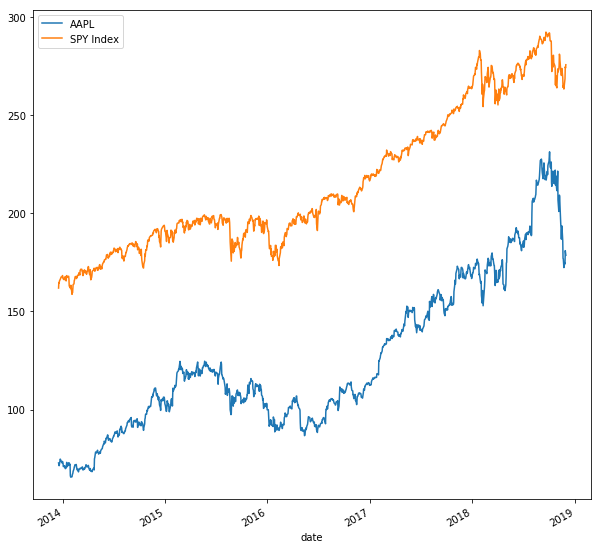

In [34]:
aapl["close"].plot(label="AAPL",figsize=(10,10))
spy_etf["close"].plot(label="SPY Index")
plt.legend()

In [36]:
aapl["cumulative"] = aapl["close"] / aapl["close"].iloc[0]
spy_etf["cumulative"] = spy_etf["close"] / spy_etf["close"].iloc[0]

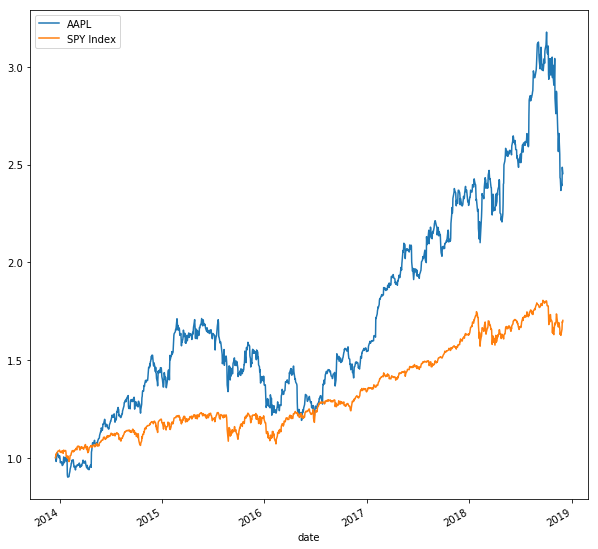

In [37]:
aapl["cumulative"].plot(label="AAPL",figsize=(10,10))
spy_etf["cumulative"].plot(label="SPY Index")
plt.legend()

In [39]:
aapl["daily_return"] = aapl["close"].pct_change(1)
spy_etf["daily_return"] = spy_etf["close"].pct_change(1)

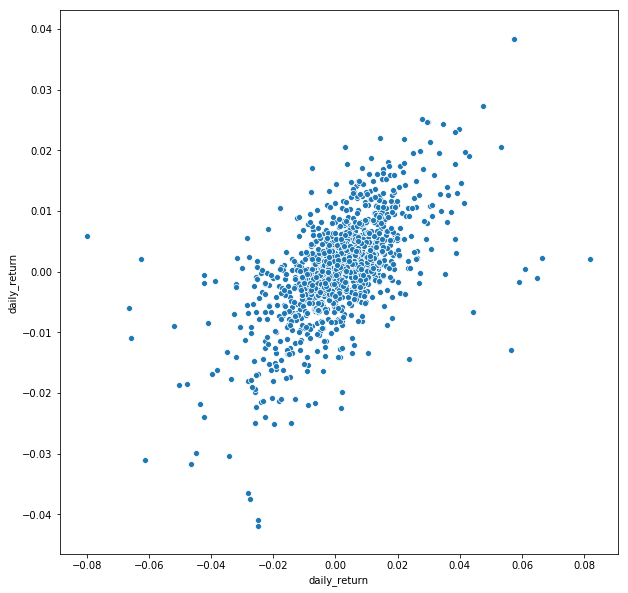

In [46]:
plt.figure(figsize=(10,10))
sns.scatterplot(aapl["daily_return"],spy_etf["daily_return"],legend='full')
plt.show()

In [47]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl["daily_return"].iloc[1:],spy_etf["daily_return"].iloc[1:])

In [48]:
beta

0.32218832811722403

In [49]:
alpha

0.0001915746737153042

In [50]:
r_value

0.5959924911880784

In [55]:
spy_etf["daily_return"].head()

date
2013-12-17         NaN
2013-12-18    0.017073
2013-12-19   -0.001156
2013-12-20    0.005818
2013-12-23    0.005343
Name: daily_return, dtype: float64

In [57]:
noise = np.random.normal(0,0.001,len(spy_etf["daily_return"].iloc[1:]))

In [59]:
fake_stock = spy_etf["daily_return"].iloc[1:] + noise

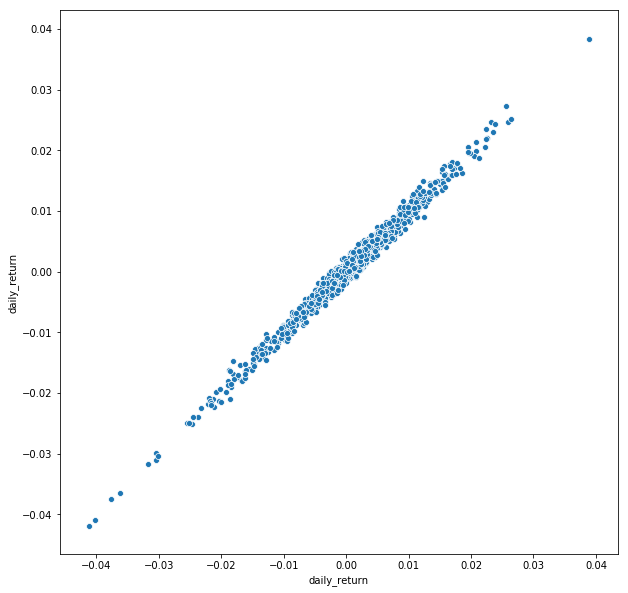

In [60]:
plt.figure(figsize=(10,10))
sns.scatterplot(fake_stock,spy_etf["daily_return"],legend='full')
plt.show()

In [61]:
beta,alpha,r_value,p_value,std_err = stats.linregress(fake_stock,spy_etf["daily_return"].iloc[1:])

In [62]:
beta

0.9846914052670417

In [63]:
alpha

3.194846978637084e-05

In [64]:
r_value

0.9924990417853475

In [65]:
p_value

0.0

In [66]:
std_err

0.0034361211179850595